In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
%matplotlib inline


# Methods required for this Competition

In [2]:
def outlier_treatment(datacolumn):
 sorted(datacolumn)
 Q1,Q3 = np.percentile(datacolumn , [25,75])
 IQR = Q3 - Q1
 lower_range = Q1 - (1.5 * IQR)
 upper_range = Q3 + (1.5 * IQR)
 return lower_range,upper_range

In [3]:
test = pd.read_csv('https://raw.githubusercontent.com/RajatDudejaj/big-mart-sales/master/test.csv')
train = pd.read_csv('https://raw.githubusercontent.com/RajatDudejaj/big-mart-sales/master/train.csv')
train_original = train.copy()
test_original = test.copy()

In [4]:
test.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.300,reg,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,NaN,Tier 3,Grocery Store
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,NaN,Tier 2,Supermarket Type1
4,FDY38,NaN,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3


In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [6]:
train.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [7]:
train.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [8]:
test.isnull().sum()

Item_Identifier                 0
Item_Weight                   976
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  1606
Outlet_Location_Type            0
Outlet_Type                     0
dtype: int64

In [9]:
test.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year
count,4705.000000,5681.000000,5681.000000,5681.000000
mean,12.695633,0.065684,141.023273,1997.828903
std,4.664849,0.051252,61.809091,8.372256
min,4.555000,0.000000,31.990000,1985.000000
25%,8.645000,0.027047,94.412000,1987.000000
50%,12.500000,0.054154,141.415400,1999.000000
75%,16.700000,0.093463,186.026600,2004.000000
max,21.350000,0.323637,266.588400,2009.000000


In [10]:
#Target variable
[a for a in train.columns if a not in test.columns][0]

'Item_Outlet_Sales'

In [11]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [12]:
num_columns = []
cat_columns = []
for i in train.columns:
    if train[i].dtype != 'object':
        num_columns.append(i)
    else:
        cat_columns.append(i)

In [13]:
num_columns

['Item_Weight',
 'Item_Visibility',
 'Item_MRP',
 'Outlet_Establishment_Year',
 'Item_Outlet_Sales']

In [14]:
cat_columns

['Item_Identifier',
 'Item_Fat_Content',
 'Item_Type',
 'Outlet_Identifier',
 'Outlet_Size',
 'Outlet_Location_Type',
 'Outlet_Type']

In [15]:
for i in cat_columns:
    if i != 'Item_Identifier':
        print(train[i].value_counts(dropna=False))
        print()

Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64

Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: Item_Type, dtype: int64

OUT027    935
OUT013    932
OUT049    930
OUT035    930
OUT046    930
OUT045    929
OUT018    928
OUT017    926
OUT010    555
OUT019    528
Name: Outlet_Identifier, dtype: int64

Medium    2793
NaN       2410
Small     2388
High       932
Name: Outlet_Size, dtype: int64

Tier 3    3350
Tier 2    2785
Tier 1    2388
Name: Outlet_Location_Type, dtype: int64

Supermarket 

Identify variables as categorical,ordinal and numeric
Non-numeric : Item_Fat_Content,Outlet_Size


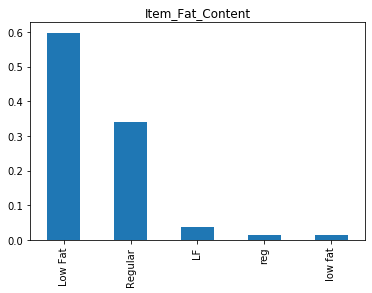

In [16]:
train['Item_Fat_Content'].value_counts(normalize=True).plot.bar(title= 'Item_Fat_Content') 

In [17]:
# def convert_Item_Fat_Content(x):
#     if x == 'LF' or x == 'low fat'  or x == 'Low Fat':
#         return 'Low Fat'
#     else:
#         return 'Regular'
def convert_Item_Fat_Content(x):
    return x

In [18]:
train['Item_Fat_Content'] = train['Item_Fat_Content'].apply(convert_Item_Fat_Content)
test['Item_Fat_Content'] = test['Item_Fat_Content'].apply(convert_Item_Fat_Content)

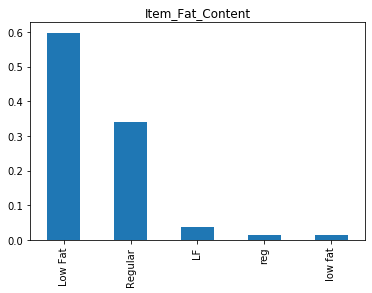

In [19]:
train['Item_Fat_Content'].value_counts(normalize=True).plot.bar(title= 'Item_Fat_Content') 

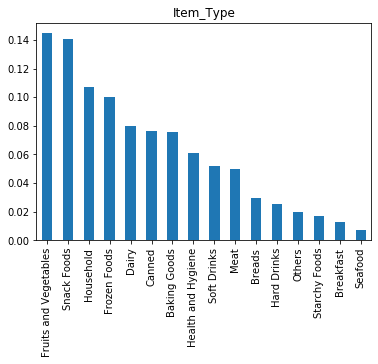

In [20]:
train['Item_Type'].value_counts(normalize=True).plot.bar(title= 'Item_Type') 

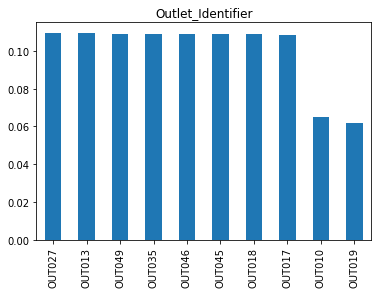

In [21]:
train['Outlet_Identifier'].value_counts(normalize=True).plot.bar(title= 'Outlet_Identifier') 

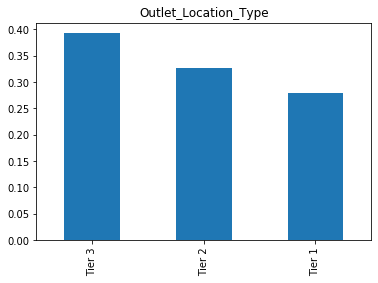

In [22]:
train['Outlet_Location_Type'].value_counts(normalize=True).plot.bar(title= 'Outlet_Location_Type') 

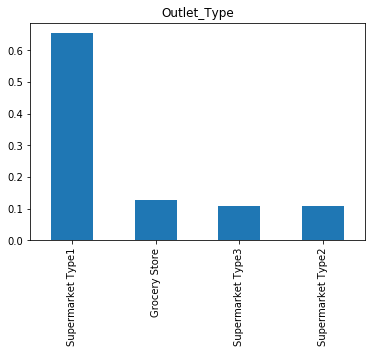

In [23]:
train['Outlet_Type'].value_counts(normalize=True).plot.bar(title= 'Outlet_Type') 

# Univariate analysis of numeric fields

In [24]:
num_columns

['Item_Weight',
 'Item_Visibility',
 'Item_MRP',
 'Outlet_Establishment_Year',
 'Item_Outlet_Sales']

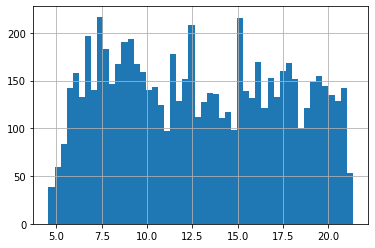

In [25]:
train.Item_Weight.hist(bins=50)

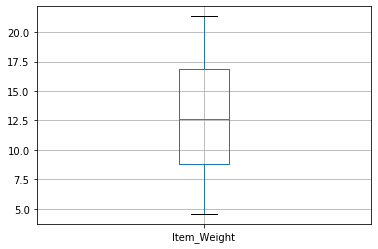

In [26]:
# train.boxplot(columns='Item_Weight')
train.boxplot(column='Item_Weight')


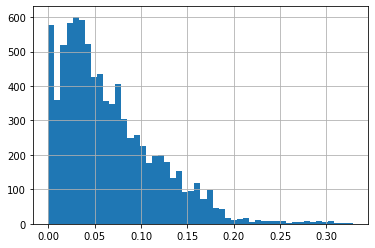

In [27]:

train['Item_Visibility'].hist(bins=50)

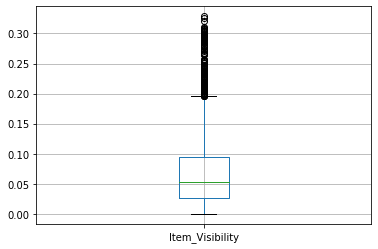

In [28]:
train.boxplot(column='Item_Visibility')


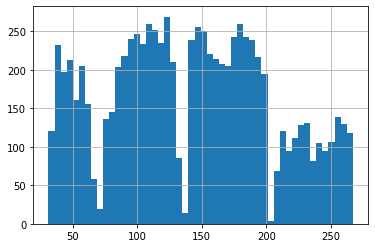

In [29]:
train.Item_MRP.hist(bins=50)

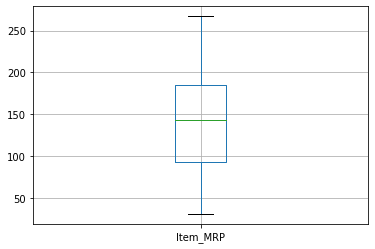

In [30]:
train.boxplot(column='Item_MRP')


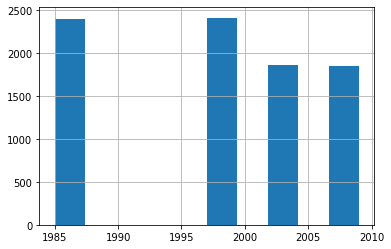

In [31]:
train.Outlet_Establishment_Year.hist()

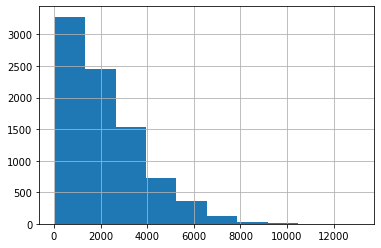

In [32]:
train.Item_Outlet_Sales.hist()

# Testing Block starts

In [33]:
a = train.copy()

In [34]:
a['IV']  = a['Item_Visibility']*100

In [35]:
a[['IV','Item_Visibility']]

,IV,Item_Visibility
0,1.604730,0.016047
1,1.927822,0.019278
2,1.676007,0.016760
3,0.000000,0.000000
4,0.000000,0.000000
...,...,...
8518,5.678339,0.056783
8519,4.698243,0.046982
8520,3.518627,0.035186
8521,14.522065,0.145221


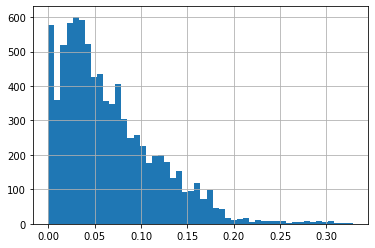

In [36]:
a['Item_Visibility'].hist(bins=50)

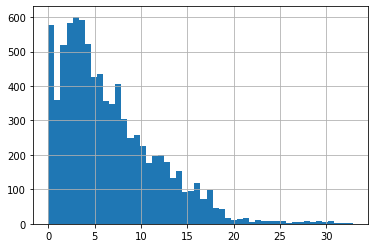

In [37]:
a['IV'].hist(bins=50)

In [38]:
a['IV_log'] = np.log(a['IV'])

C:\Users\skdud\anaconda3\lib\site-packages\pandas\core\series.py:679: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [39]:
lowerbound,upperbound = outlier_treatment(a.Item_Visibility)


In [40]:
a.drop(a[ (a.Item_Visibility > upperbound) | (a.Item_Visibility < lowerbound) ].index , inplace=True)

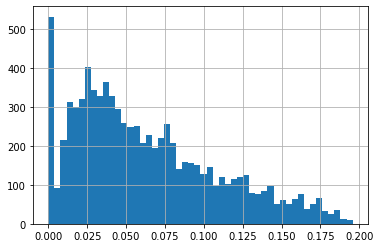

In [41]:
a['Item_Visibility'].hist(bins=50)

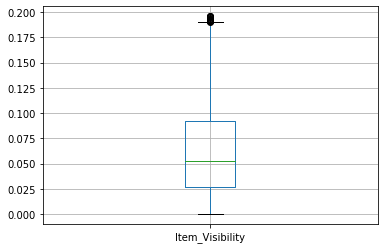

In [42]:
a.boxplot(column='Item_Visibility')

In [43]:
print(a.shape)
print(train.shape)

(8379, 14)
(8523, 12)


# Testing Block ends

# BiVariate Analysis

In [44]:
#This will be done later

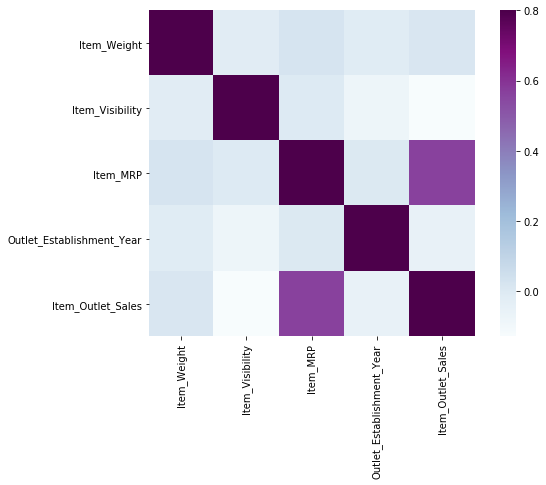

In [45]:
matrix = train.corr() 
f, ax = plt.subplots(figsize=(9, 6))
sns.heatmap(matrix, vmax=.8, square=True, cmap="BuPu");

# Missing values and outliers treatment 

In [46]:
train.apply(lambda x:sum(x.isnull()))

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [47]:
test.apply(lambda x:sum(x.isnull()))

Item_Identifier                 0
Item_Weight                   976
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  1606
Outlet_Location_Type            0
Outlet_Type                     0
dtype: int64

In [48]:
print(train['Item_Weight'].dtype)
print(train.Outlet_Size.dtype)

float64
object


In [49]:
#Let's fill Item_Weight by its mean as mean,median and mode all are in 12
train['Item_Weight'] = train['Item_Weight'].fillna(train['Item_Weight'].mean())
test['Item_Weight'] = test['Item_Weight'].fillna(test['Item_Weight'].mean())

In [50]:
#In Case of train.Outlet_Size, we have 28% missing values, one way around is to create a new category in Outlet_Size
print('Missing values Percentage in training data set')
print(train.Outlet_Size.value_counts(normalize=True,dropna=False),'\n')
print('Missing values Percentage in test data set')
print(test.Outlet_Size.value_counts(normalize=True,dropna=False))

Missing values Percentage in training data set
Medium    0.327702
NaN       0.282764
Small     0.280183
High      0.109351
Name: Outlet_Size, dtype: float64 

Missing values Percentage in test data set
Medium    0.327759
NaN       0.282697
Small     0.280232
High      0.109312
Name: Outlet_Size, dtype: float64


In [51]:
train.Outlet_Size.fillna('custom_category',inplace=True)
test.Outlet_Size.fillna('custom_category',inplace=True)

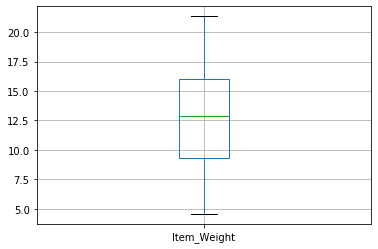

In [52]:
train.boxplot('Item_Weight')

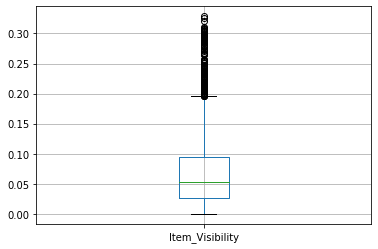

In [53]:
train.boxplot('Item_Visibility')

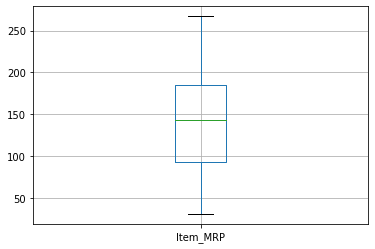

In [54]:
train.boxplot('Item_MRP')

In [55]:
train.Item_Visibility.mode()

0    0.0
dtype: float64

# Convert cat to num columns

In [56]:
print(train.shape)
print(test.shape)

(8523, 12)
(5681, 11)


In [57]:
test.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.750000,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.300000,reg,0.038428,Dairy,87.3198,OUT017,2007,custom_category,Tier 2,Supermarket Type1
2,NCN55,14.600000,Low Fat,0.099575,Others,241.7538,OUT010,1998,custom_category,Tier 3,Grocery Store
3,FDQ58,7.315000,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,custom_category,Tier 2,Supermarket Type1
4,FDY38,12.695633,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3


In [58]:
train=train.drop('Item_Identifier',axis=1) 
test=test.drop('Item_Identifier',axis=1)
X = train.drop('Item_Outlet_Sales',1) 
y = train.Item_Outlet_Sales


In [59]:
X=pd.get_dummies(X) 
train=pd.get_dummies(train) 
test=pd.get_dummies(test)

In [60]:
test.shape

(5681, 46)

In [61]:
X.shape

(8523, 46)

In [62]:
x_train, x_cv, y_train, y_cv = train_test_split(X,y, test_size =0.3)


In [63]:
regressor = LinearRegression()  
regressor.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [64]:
coeff_df = pd.DataFrame(regressor.coef_, X.columns, columns=['Coefficient'])  
coeff_df

,Coefficient
Item_Weight,0.576118
Item_Visibility,-89.145343
Item_MRP,15.511354
Outlet_Establishment_Year,-14.957746
Item_Fat_Content_LF,-14.500004
Item_Fat_Content_Low Fat,66.715776
Item_Fat_Content_Regular,95.831358
Item_Fat_Content_low fat,-81.830969
Item_Fat_Content_reg,-66.216160
Item_Type_Baking Goods,22.905599


In [65]:
y_pred = regressor.predict(x_cv)


In [66]:
df = pd.DataFrame({'Actual': y_cv, 'Predicted': y_pred})
df1 = df.head(25)

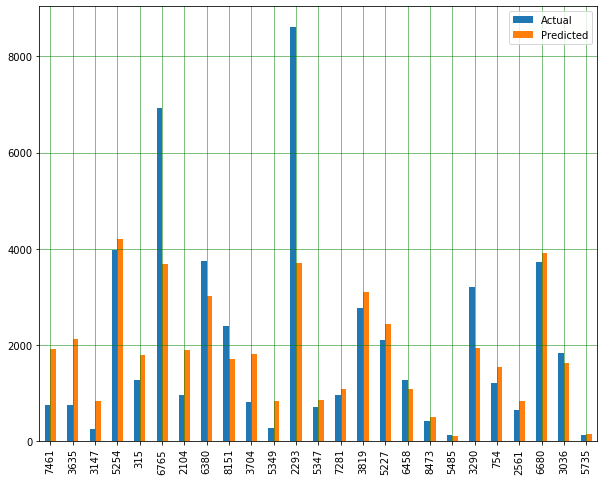

In [67]:
df1.plot(kind='bar',figsize=(10,8))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

In [68]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_cv, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_cv, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_cv, y_pred)))

Mean Absolute Error: 830.4265498435633
Mean Squared Error: 1236154.3270847383
Root Mean Squared Error: 1111.8247735523519


In [69]:
pred_test = regressor.predict(test)

# Read Submission file and create our first submission file using Linear Regression

In [70]:
submission=pd.read_csv("https://raw.githubusercontent.com/RajatDudejaj/big-mart-sales/master/sample_submission.csv")

In [71]:
submission['Item_Outlet_Sales']=pred_test 
submission['Item_Identifier'] = test_original['Item_Identifier']
submission['Outlet_Identifier']=test_original['Outlet_Identifier']


In [72]:
submission['Item_Outlet_Sales'] = submission['Item_Outlet_Sales'].apply(lambda x:-1*x if x<0 else x )

In [73]:
pd.DataFrame(submission, columns=['Item_Identifier','Outlet_Identifier','Item_Outlet_Sales']).to_csv(r'C:\Users\skdud\Desktop\Repo\linearreg1.csv',index=False)

# Now some tweaks will be done in order to get good RMSE

In [74]:
from sklearn.ensemble import RandomForestRegressor

In [75]:
rf_regressor = RandomForestRegressor(n_estimators=10,random_state=0)
rf_regressor.fit(x_train, y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=10, n_jobs=None, oob_score=False,
                      random_state=0, verbose=0, warm_start=False)

In [76]:
y_pred = rf_regressor.predict(x_cv)


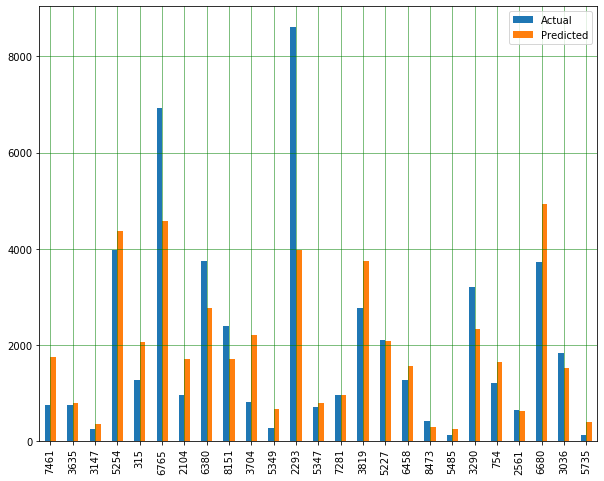

In [77]:
df2 = pd.DataFrame({'Actual': y_cv, 'Predicted': y_pred})
df3 = df2.head(25)
df3.plot(kind='bar',figsize=(10,8))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

In [78]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_cv, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_cv, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_cv, y_pred)))

Mean Absolute Error: 819.5727722174422
Mean Squared Error: 1344918.238501075
Root Mean Squared Error: 1159.7061000534036


In [79]:
pred_test = regressor.predict(test)
submission=pd.read_csv("https://raw.githubusercontent.com/RajatDudejaj/big-mart-sales/master/sample_submission.csv")
submission['Item_Outlet_Sales']=pred_test 
submission['Item_Identifier'] = test_original['Item_Identifier']
submission['Outlet_Identifier']=test_original['Outlet_Identifier']
submission['Item_Outlet_Sales'] = submission['Item_Outlet_Sales'].apply(lambda x:-1*x if x<0 else x )
pd.DataFrame(submission, columns=['Item_Identifier','Outlet_Identifier','Item_Outlet_Sales']).to_csv(r'C:\Users\skdud\Desktop\Repo\random_forest1.csv',index=False)

# Some Feature Engineering

In [80]:
train.head()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales,Item_Fat_Content_LF,Item_Fat_Content_Low Fat,Item_Fat_Content_Regular,Item_Fat_Content_low fat,Item_Fat_Content_reg,...,Outlet_Size_Medium,Outlet_Size_Small,Outlet_Size_custom_category,Outlet_Location_Type_Tier 1,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3
0,9.30,0.016047,249.8092,1999,3735.1380,0,1,0,0,0,...,1,0,0,1,0,0,0,1,0,0
1,5.92,0.019278,48.2692,2009,443.4228,0,0,1,0,0,...,1,0,0,0,0,1,0,0,1,0
2,17.50,0.016760,141.6180,1999,2097.2700,0,1,0,0,0,...,1,0,0,1,0,0,0,1,0,0
3,19.20,0.000000,182.0950,1998,732.3800,0,0,1,0,0,...,0,0,1,0,0,1,1,0,0,0
4,8.93,0.000000,53.8614,1987,994.7052,0,1,0,0,0,...,0,0,0,0,0,1,0,1,0,0


In [81]:
X['MRP_Per_item'] = round(X['Item_MRP']/X['Item_Weight'],2)
test['MRP_Per_item'] = round(test['Item_MRP']/test['Item_Weight'],2)

In [82]:
X['year_difference'] = 2020 - X['Outlet_Establishment_Year']
test['year_difference'] = 2020 - test['Outlet_Establishment_Year']

In [83]:
x_train, x_cv, y_train, y_cv = train_test_split(X,y, test_size =0.3)

rf_regressor = RandomForestRegressor(n_estimators=10,random_state=0)
rf_regressor.fit(x_train, y_train)
y_pred = rf_regressor.predict(x_cv)


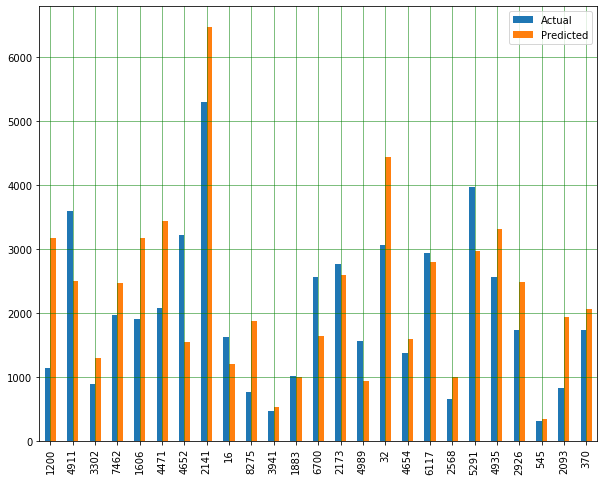

In [84]:
df2 = pd.DataFrame({'Actual': y_cv, 'Predicted': y_pred})
df3 = df2.head(25)
df3.plot(kind='bar',figsize=(10,8))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

In [85]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_cv, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_cv, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_cv, y_pred)))

Mean Absolute Error: 855.8559819632383
Mean Squared Error: 1526693.108476083
Root Mean Squared Error: 1235.5942329406055


In [86]:
X.shape
test.shape

(5681, 48)

In [87]:
pred_test = rf_regressor.predict(test)
submission=pd.read_csv("https://raw.githubusercontent.com/RajatDudejaj/big-mart-sales/master/sample_submission.csv")
submission['Item_Outlet_Sales']=pred_test 
submission['Item_Identifier'] = test_original['Item_Identifier']
submission['Outlet_Identifier']=test_original['Outlet_Identifier']
submission['Item_Outlet_Sales'] = submission['Item_Outlet_Sales'].apply(lambda x:-1*x if x<0 else x )
pd.DataFrame(submission, columns=['Item_Identifier','Outlet_Identifier','Item_Outlet_Sales']).to_csv(r'C:\Users\skdud\Desktop\Repo\random_forest2.csv',index=False)

In [88]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

In [89]:
feature_name = X.columns.tolist()

def cor_selector(X, y):
    cor_list = []
    # calculate the correlation with y for each feature
    for i in X.columns.tolist():
        cor = np.corrcoef(X[i], y)[0, 1]
        cor_list.append(cor)
    # replace NaN with 0
    cor_list = [0 if np.isnan(i) else i for i in cor_list]
    # feature name
    cor_feature = X.iloc[:,np.argsort(np.abs(cor_list))[-10:]].columns.tolist()
    # feature selection? 0 for not select, 1 for select
    cor_support = [True if i in cor_feature else False for i in feature_name]
    return cor_support, cor_feature

In [90]:
cor_support, cor_feature = cor_selector(X, y)
print(str(len(cor_feature)), 'selected features')

10 selected features


In [91]:
cor_feature

['Item_Visibility',
 'Outlet_Size_custom_category',
 'Outlet_Size_Medium',
 'Outlet_Identifier_OUT019',
 'Outlet_Identifier_OUT010',
 'Outlet_Identifier_OUT027',
 'Outlet_Type_Supermarket Type3',
 'MRP_Per_item',
 'Outlet_Type_Grocery Store',
 'Item_MRP']

In [92]:
x_train, x_cv, y_train, y_cv = train_test_split(X[cor_feature],y, test_size =0.3)

rf_regressor = RandomForestRegressor(n_estimators=10,random_state=0)
rf_regressor.fit(x_train[cor_feature], y_train)
y_pred = rf_regressor.predict(x_cv[cor_feature])

In [93]:
pred_test = rf_regressor.predict(test[cor_feature])
submission=pd.read_csv("https://raw.githubusercontent.com/RajatDudejaj/big-mart-sales/master/sample_submission.csv")
submission['Item_Outlet_Sales']=pred_test 
submission['Item_Identifier'] = test_original['Item_Identifier']
submission['Outlet_Identifier']=test_original['Outlet_Identifier']
submission['Item_Outlet_Sales'] = submission['Item_Outlet_Sales'].apply(lambda x:-1*x if x<0 else x )
pd.DataFrame(submission, columns=['Item_Identifier','Outlet_Identifier','Item_Outlet_Sales']).to_csv(r'C:\Users\skdud\Desktop\Repo\random_forest3.csv',index=False)